In [23]:
## The following code is how we did all analysis (with the exception of the dpendencies, which are just here so it runs).
## The code is simply copied and pasted for any analysis that needs to be done by changing the array that runs the for loop as
##    well as some minor tweaking for formatting titles and labels.
## First is the NAICS analysis, then the much more generalized poverty analysis.

In [24]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from pprint import pprint

# Import csv broadband data to dataframe
broadband_df = pd.read_csv("CSV_files/clean_broadband.csv")

# Census API Key
from config import census_api_key

In [25]:
# The data is grabbed from the relevant csv
NAICS_2017_csv_paths_df = pd.read_csv(f'CSV_files/NAICS_2017_csv_paths.csv')
NAICS_2017_csv_paths_df

,Paths
0,CSV_files/2017_Utilities_ecnbasic.csv
1,CSV_files/2017_Information_ecnbasic.csv
2,CSV_files/2017_Finance and insurance_ecnbasic.csv
3,CSV_files/2017_Real estate and rental and leas...
4,"CSV_files/2017_Professional, scientific, and t..."
5,CSV_files/2017_Administrative and support and ...
6,CSV_files/2017_Educational services_ecnbasic.csv
7,CSV_files/2017_Health care and social assistan...
8,"CSV_files/2017_Arts, entertainment, and recrea..."
9,CSV_files/2017_Accommodation and food services...


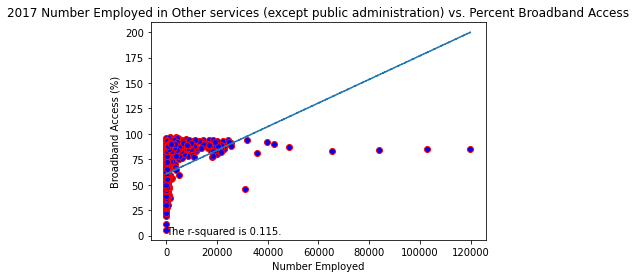

In [26]:
# This section runs a linear regression for all NAICS labels and broadband access


# for loop looping through all paths created in previous steps analyzes all files based upon number employed vs broadband access
#    for a specific NAICS label.
for path in NAICS_2017_csv_paths_df["Paths"]:
    
    # Clears figure so plots do not superimpose
    plt.clf()
    
    # Dataframe for relevant label is made
    label_df = pd.read_csv(path)
    
    # Lists for x and y values are defined
    x = label_df['Number Employed']
    y = label_df['Broadband (%)']

    # Linear regression is run
    label_slope, label_int, label_r, p, std_err = stats.linregress(x ,y)
    label_fit = label_slope * x + label_int

    # Plot is crafted and labeled then linear regression and r-squared are superimposed
    plt.scatter(x ,y , marker="o", facecolors="blue", edgecolors="red")
    plt.title(f'{label_df["Year"].min()} Number Employed in {label_df["NAICS2017 Label"].min()} vs. Percent Broadband Access')
    plt.xlabel("Number Employed")
    plt.ylabel("Broadband Access (%)")
    plt.plot(x , label_fit,"--")
    plt.text(0,1.2,f'The r-squared is {round(label_r**2,3)}.')

    # plot is output and saved as a png
    plt.savefig(f'output_charts/{label_df["Year"].min()}_NAICS_{label_df["NAICS2017 Label"].min()}_lin_regress.png',format='png')

In [27]:
## The poverty analysis has a few fairly unrelated values, so it is a bit more generalized

In [28]:
# The relevant dataframe is grabbed from the csv so it can be run here.
census_2017_acs5_df = pd.read_csv("CSV_files/census_2017_acs5_df.csv")

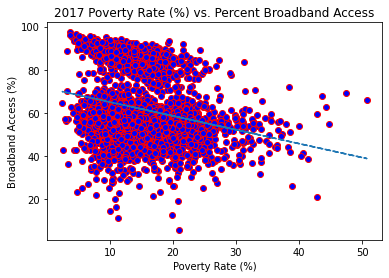

In [29]:
# This section runs a linear regression for all NAICS labels and broadband access

# Array of column headers to be analyzed against broadband access as a percent
headers = ["Population", "Median Age", "Household Income", "Per Capita Income", "Poverty Rate (%)"]

# Arrays to hold r and r-squared values are initilaized
r_squared = []
r_values = []

# for loop looping through each header
for header in headers:

    # Clears figure so plots do not superimpose
    plt.clf()
    
    # Lists for x and y values are defined
    x = census_2017_acs5_df[header]
    y = census_2017_acs5_df['Broadband (%)']

    # Linear regression is run
    header_slope, header_int, header_r, p, std_err = stats.linregress(x ,y)
    header_fit = header_slope * x + header_int

    # Plot is crafted and labeled then linear regression and r-squared is superimposed
    plt.scatter(x ,y , marker="o", facecolors="blue", edgecolors="red")
    plt.title(f'2017 {header} vs. Percent Broadband Access')
    plt.xlabel(header)
    plt.ylabel("Broadband Access (%)")
    plt.plot(x , header_fit,"--")
    
    # r_squared values are appended to relevant lists
    r_squared.append(f'The r-squared for {header} is {round(header_r**2,3)}.')
    r_values.append(f'The r-value for {header} is {round(header_r,3)}.')

    # plot is output and saved as a png
    plt.savefig(f'output_charts/2017_acs5_{header}_lin_regress.png',format='png')

In [30]:
r_squared

['The r-squared for Population is 0.145.',
 'The r-squared for Median Age is 0.07.',
 'The r-squared for Household Income is 0.204.',
 'The r-squared for Per Capita Income is 0.176.',
 'The r-squared for Poverty Rate (%) is 0.06.']

In [31]:
r_values

['The r-value for Population is 0.381.',
 'The r-value for Median Age is -0.265.',
 'The r-value for Household Income is 0.452.',
 'The r-value for Per Capita Income is 0.419.',
 'The r-value for Poverty Rate (%) is -0.244.']